In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    #for filename in filenames:
     #   print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/deepfakerp2
/kaggle/input/deepfakerp2/Dataset
/kaggle/input/deepfakerp2/Dataset/fake
/kaggle/input/deepfakerp2/Dataset/real


In [2]:
import torch
import torch.nn as nn

class DeepFakeDetectionModel(nn.Module):
    def __init__(self):
        super(DeepFakeDetectionModel, self).__init__()

        # Initial Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3,padding=1)
        self.leaky_relu1 = nn.LeakyReLU()
        self.batchnorm1 = nn.BatchNorm2d(8)

        # Block 1: Two Convolutional Layers with BatchNorm
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3,padding=1)
        self.leaky_relu2 = nn.LeakyReLU()
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,padding=1)
        self.leaky_relu3 = nn.LeakyReLU()
        self.batchnorm2 = nn.BatchNorm2d(16)
        self.pooling1 = nn.AvgPool2d(kernel_size=2)

        # Block 2: Three Convolutional Layers with BatchNorm
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,padding=1)
        self.leaky_relu4 = nn.LeakyReLU()
        #self.batchnorm4 = nn.BatchNorm2d(32)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,padding=1)
        self.leaky_relu5 = nn.LeakyReLU()
        #self.batchnorm5 = nn.BatchNorm2d(32)
        self.conv6 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,padding=1)
        self.leaky_relu6 = nn.LeakyReLU()
        self.batchnorm3 = nn.BatchNorm2d(32)
        self.pooling2 = nn.AvgPool2d(kernel_size=2)

        # Block 3: Four Convolutional Layers with BatchNorm
        self.conv7 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,padding=1)
        self.leaky_relu7 = nn.LeakyReLU()
        #self.batchnorm7 = nn.BatchNorm2d(64)
        self.conv8 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        self.leaky_relu8 = nn.LeakyReLU()
        #self.batchnorm8 = nn.BatchNorm2d(64)
        self.conv9 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        self.leaky_relu9 = nn.LeakyReLU()
        #self.batchnorm9 = nn.BatchNorm2d(64)
        self.conv10 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        self.leaky_relu10 = nn.LeakyReLU()
        self.batchnorm4 = nn.BatchNorm2d(64)
        self.pooling3 = nn.AvgPool2d(kernel_size=2)

        # Block 4: Two Convolutional Layers with BatchNorm
        self.conv11 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5,padding=2)
        self.leaky_relu11 = nn.LeakyReLU()
       # self.batchnorm11 = nn.BatchNorm2d(128)
        self.batchnorm5 = nn.BatchNorm2d(128)
        self.pooling4 = nn.MaxPool2d(kernel_size=2)

        # Block 5: One Convolutional Layer with BatchNorm
        self.conv12 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5,padding=2)
        self.leaky_relu12 = nn.LeakyReLU()
        self.batchnorm6 = nn.BatchNorm2d(256)
        self.pooling5 = nn.MaxPool2d(kernel_size=2)

        # Fully Connected Layers
        
        self.flatten = nn.Flatten()
        self.dropout1 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(256*5*5, 32)
        self.leaky_relu22 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(32, 16)
        self.leaky_relu23 = nn.LeakyReLU()
        self.dropout3 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(16, 16)
        self.leaky_relu24 = nn.LeakyReLU()
        self.dropout4 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.batchnorm1(self.leaky_relu1(self.conv1(x)))
        x = self.pooling1(self.batchnorm2(self.leaky_relu3(self.conv3(self.leaky_relu2(self.conv2(x))))))

        x = self.pooling2(self.batchnorm3(self.leaky_relu6(self.conv6(self.leaky_relu5(self.conv5(self.leaky_relu4(self.conv4(x))))))))

        x = self.pooling3(self.batchnorm4(self.leaky_relu10(self.conv10(self.leaky_relu9(self.conv9(self.leaky_relu8(self.conv8(self.leaky_relu7(self.conv7(x))))))))))

        x = self.pooling4(self.batchnorm5(self.leaky_relu11(self.conv11(x))))

        x = self.pooling5(self.batchnorm6(self.leaky_relu12(self.conv12(x))))
        x = self.flatten(x)
        x = self.dropout1(x)
        x = self.leaky_relu22(self.fc1(x))
        x = self.dropout2(x)
        x = self.leaky_relu23(self.fc2(x))
        x = self.dropout3(x)
        x = self.leaky_relu24(self.fc3(x))
        x = self.dropout4(x)
        x = self.fc4(x)
        x = self.sigmoid(x)

        return x

# Create an instance of the model
model = DeepFakeDetectionModel()

# Print the model architecture
print(model)


DeepFakeDetectionModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu1): LeakyReLU(negative_slope=0.01)
  (batchnorm1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu2): LeakyReLU(negative_slope=0.01)
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu3): LeakyReLU(negative_slope=0.01)
  (batchnorm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pooling1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu4): LeakyReLU(negative_slope=0.01)
  (conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu5): LeakyReLU(negative_slope=0.01)
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu6): LeakyReLU

In [3]:
# import os
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader
# import torchvision.transforms as transforms
# from torchvision.datasets import ImageFolder
# import matplotlib.pyplot as plt

# # Define your model (replace YourModel with your actual model class)
# model = DeepFakeDetectionModel()

# # Set the dataset path
# dataset_path = '/kaggle/input/deepfakerp2/Dataset'

# # Define data transforms
# transform = transforms.Compose([
#     transforms.Resize((160, 160)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# # Define data augmentation transforms for training
# train_transform = transforms.Compose([
#     transforms.Resize((160, 160)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.RandomRotation(360),
#     transforms.ColorJitter(brightness=0.2),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# # Define dataset and data loaders
# batch_size = 64
# #train_dataset = ImageFolder(os.path.join(dataset_path, 'train'), transform=train_transform)
# #val_dataset = ImageFolder(os.path.join(dataset_path, 'val'), transform=transform)
# train_dataset = ImageFolder(dataset_path, transform=train_transform)
# val_dataset = ImageFolder(dataset_path, transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# # Define loss function and optimizer
# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # Training and validation loop
# num_epochs = 5
# train_losses, val_losses = [], []

# for epoch in range(num_epochs):
#     model.train()
#     running_train_loss = 0.0

#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         print(inputs.shape)
#         outputs = model(inputs)
#         loss = criterion(outputs, labels.float().unsqueeze(1))
#         loss.backward()
#         optimizer.step()
#         running_train_loss += loss.item()

#     train_loss = running_train_loss / len(train_loader)
#     train_losses.append(train_loss)

#     model.eval()
#     running_val_loss = 0.0

#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels.float().unsqueeze(1))
#             running_val_loss += loss.item()

#     val_loss = running_val_loss / len(val_loader)
#     val_losses.append(val_loss)

#     print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# # Visualize training and validation loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Train Loss', color='blue')
# plt.plot(val_losses, label='Validation Loss', color='red')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()


In [4]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model

# def deep_fake_detection_model(input_shape=(160, 160, 3)):
#     # Input layer
#     inputs = tf.keras.Input(shape=input_shape)
    
#     # Initial Convolutional Layer
#     x = layers.Conv2D(8, (3, 3), padding='same')(inputs)
#     x = layers.LeakyReLU()(x)
#     x = layers.BatchNormalization()(x)

#     # Block 1: Two Convolutional Layers with BatchNorm
#     x = layers.Conv2D(16, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Conv2D(16, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.AveragePooling2D(pool_size=(2, 2))(x)

#     # Block 2: Three Convolutional Layers with BatchNorm
#     x = layers.Conv2D(32, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Conv2D(32, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Conv2D(32, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.AveragePooling2D(pool_size=(2, 2))(x)

#     # Block 3: Four Convolutional Layers with BatchNorm
#     x = layers.Conv2D(64, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Conv2D(64, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Conv2D(64, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Conv2D(64, (3, 3), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.AveragePooling2D(pool_size=(2, 2))(x)

#     # Block 4: Two Convolutional Layers with BatchNorm
#     x = layers.Conv2D(128, (5, 5), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2))(x)

#     # Block 5: One Convolutional Layer with BatchNorm
#     x = layers.Conv2D(256, (5, 5), padding='same')(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2))(x)

#     # Fully Connected Layers
#     x = layers.Flatten()(x)
#     x = layers.Dropout(0.5)(x)
#     x = layers.Dense(32)(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Dropout(0.5)(x)
#     x = layers.Dense(16)(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Dropout(0.5)(x)
#     x = layers.Dense(16)(x)
#     x = layers.LeakyReLU()(x)
#     x = layers.Dropout(0.5)(x)
#     outputs = layers.Dense(1, activation='sigmoid')(x)

#     # Create the Keras model
#     model = Model(inputs, outputs)

#     return model

# # Create an instance of the model
# model = deep_fake_detection_model()

# # Print the model summary
# model.summary()


Epoch [1/50], Train Accuracy: 0.7266, Val Accuracy: 0.9645
Epoch [2/50], Train Accuracy: 0.9515, Val Accuracy: 0.9850
Epoch [3/50], Train Accuracy: 0.9225, Val Accuracy: 0.9465
Epoch [4/50], Train Accuracy: 0.9415, Val Accuracy: 0.9470
Epoch [5/50], Train Accuracy: 0.9570, Val Accuracy: 0.9775
Epoch [6/50], Train Accuracy: 0.9245, Val Accuracy: 0.9075
Epoch [7/50], Train Accuracy: 0.8701, Val Accuracy: 0.9470
Epoch [8/50], Train Accuracy: 0.9480, Val Accuracy: 0.9480
Epoch [9/50], Train Accuracy: 0.9615, Val Accuracy: 0.9595
Epoch [10/50], Train Accuracy: 0.9665, Val Accuracy: 0.9395
Epoch [11/50], Train Accuracy: 0.9640, Val Accuracy: 0.9635
Epoch [12/50], Train Accuracy: 0.9635, Val Accuracy: 0.4998
Epoch [13/50], Train Accuracy: 0.8311, Val Accuracy: 0.4978
Epoch [14/50], Train Accuracy: 0.9650, Val Accuracy: 0.9660
Epoch [15/50], Train Accuracy: 0.9615, Val Accuracy: 0.9335
Epoch [16/50], Train Accuracy: 0.9715, Val Accuracy: 0.9695
Epoch [17/50], Train Accuracy: 0.8846, Val Accura

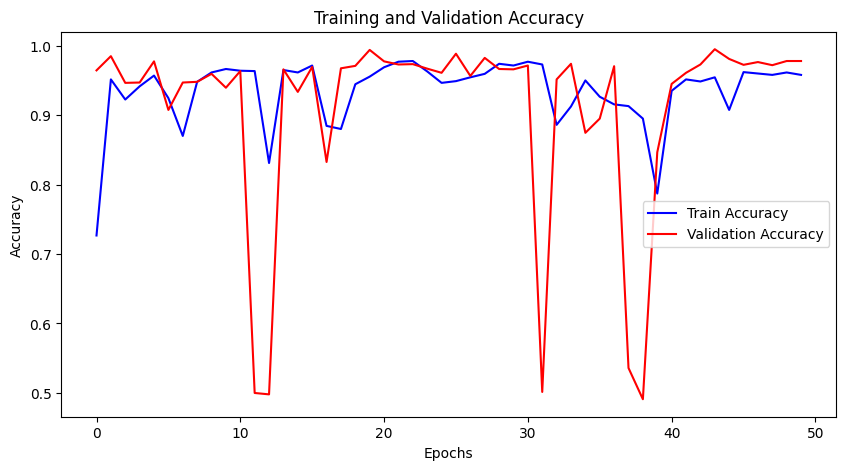

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define your model (replace YourModel with your actual model class)
model = DeepFakeDetectionModel()

# Set the dataset path
dataset_path = '/kaggle/input/deepfakerp2/Dataset'

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define data augmentation transforms for training
train_transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(360),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define dataset and data loaders
batch_size = 64
#train_dataset = ImageFolder(os.path.join(dataset_path, 'train'), transform=train_transform)
#val_dataset = ImageFolder(os.path.join(dataset_path, 'val'), transform=transform)
train_dataset = ImageFolder(dataset_path, transform=train_transform)
val_dataset = ImageFolder(dataset_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training and validation loop
num_epochs = 50
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Convert to binary predictions
        correct_train += (predicted == labels.float().unsqueeze(1)).sum().item()
        total_train += labels.size(0)

        loss = criterion(outputs, labels.float().unsqueeze(1))
        loss.backward()
        optimizer.step()

    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)

    model.eval()
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()  # Convert to binary predictions
            correct_val += (predicted == labels.float().unsqueeze(1)).sum().item()
            total_val += labels.size(0)

    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Visualize training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [6]:
PATH = "entire_model.pt"

# Save
torch.save(model, PATH)